In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

from thermal_ofc import ThermalOFC

# Run the model

In [2]:
# Create model
model = ThermalOFC(Nx=200, d=4e-4, delta_th=0.1, v=10.0, theta=2.75e-5, omega_0=1000)

In [197]:
# Run model
N_ev = 50_000

for iev in range(N_ev):
    print(f"Event {iev+1} / {N_ev}", end='\r')
    event_last, time_last = model.step()
    # event_last, time_last = model.step_athermal()

model.catalog.summary()  # print catalog summary (computes size and magnitude and packages in DataFrame in the process)
eq = model.catalog.df  # get catalog as pandas DataFrame

Event 50000 / 50000
Catalog stats:
  Time span: 0.00 - 36.90
  Number of events: 50000
  Min-Max event size: 1 - 7267
  Min-Max magnitude: -0.16 - 2.62
  Proportion of event types: 
rupture_type
thermal     0.54624
athermal    0.45376
Name: proportion, dtype: float64


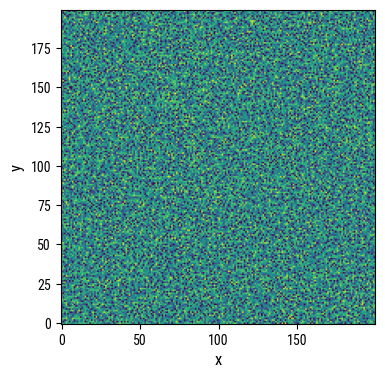

In [202]:
# Show last stress state
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.imshow(model.stress, cmap='viridis', origin='lower')

plt.tight_layout()
plt.show()

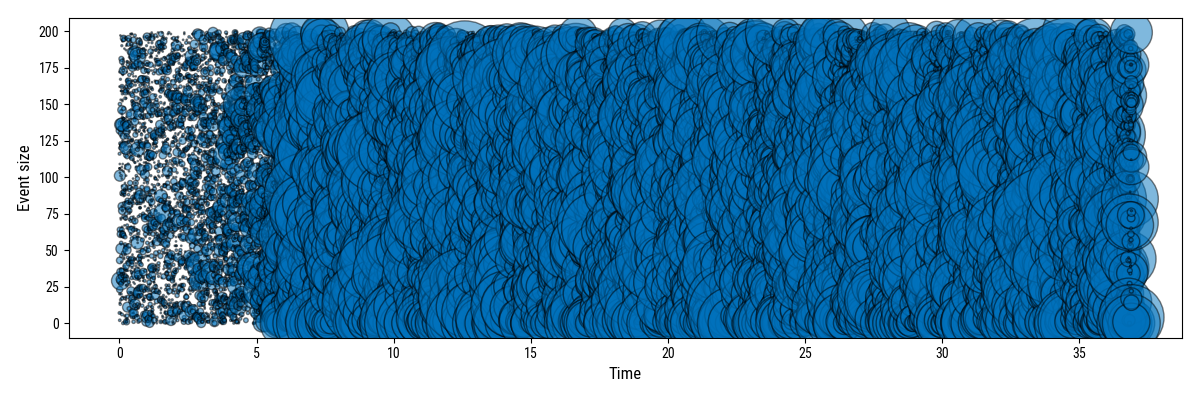

In [207]:
# Show events in time
fig, ax = plt.subplots(figsize=(12, 4))
ax.set_xlabel("Time")
ax.set_ylabel("Event size")

ax.scatter(eq['time'], eq['ii0'], s=eq["ii"].apply(len), alpha=0.5, edgecolors="k")

plt.tight_layout()
plt.show()

In [209]:
# Trim catalog to after the warmup time
t_warm = 6  # warmup time
eq = eq[eq['time'] > t_warm]  # keep only events after warmup time

Fitted slope: -1.09


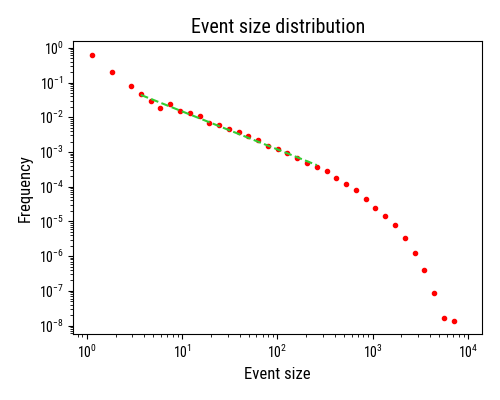

In [210]:
# Scalings on event sizes
fig, ax = plt.subplots(figsize=(5, 4))
ax.set_xlabel("Event size")
ax.set_ylabel("Frequency")
ax.set_title("Event size distribution")
ax.set_yscale("log")
ax.set_xscale("log")

# Get histogram
sizes = eq[eq["time"] > 500]["size"].unique()  # unique sizes
hist = eq[eq["time"] > 500]["size"].value_counts()  # counts for each size
ax.plot(sizes, hist.loc[sizes]/len(eq), c="k", marker='o', ms=1, ls="")  # plot histogram

# Make a histogram
bins = np.logspace(0, 4, 40)
hist, _ = np.histogram(eq["size"], bins=bins, density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2
ax.plot(bin_centers, hist, c="r", marker='o', ls="", ms=3)

# Fit a line to center part of distribution
mask = (bin_centers > 3) & (bin_centers < 300)
log_bin_centers = np.log10(bin_centers[mask])
log_hist = np.log10(hist[mask])

slope, intercept = np.polyfit(log_bin_centers, log_hist, 1)
print(f"Fitted slope: {slope:.2f}")
ax.plot(bin_centers[mask], 10**(intercept + slope * log_bin_centers), c="limegreen", ls="--", label=f"Slope: {slope:.2f}")

plt.tight_layout()
plt.show()

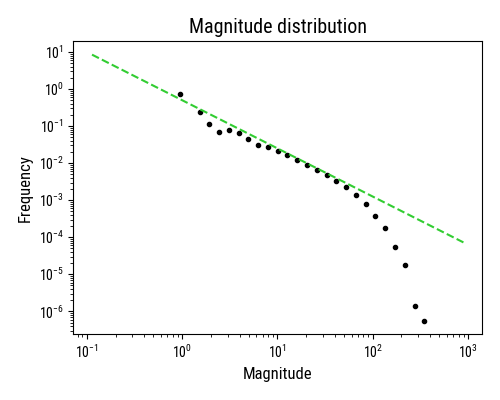

In [ ]:
# Magnitude distribution
fig, ax = plt.subplots(figsize=(5, 4))
ax.set_xlabel("Magnitude")
ax.set_ylabel("Frequency")
ax.set_title("Magnitude distribution")
ax.set_yscale("log")
ax.set_xscale("log")

# Get histogram
bins = np.logspace(-1, 3, 40)
hist, _ = np.histogram(eq[eq["time"] > 5]["size"]**(2/3), bins=bins, density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2
ax.plot(bin_centers, hist, c="k", marker='o', ls="", ms=3)

ax.plot(bin_centers, bin_centers**(-1.3)/2, c="limegreen", ls="--", label=f"Slope: -1.3")

# ax.set_xlim(1, 1000)
plt.tight_layout()
plt.show()

In [ ]:
# Save model
model.save()